In [5]:
# if package not installed yet
install.packages("imager")

Warning message in install.packages("imager"):
“installation of package ‘imager’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(imager)

ERROR: Error in library(imager): es gibt kein Paket namens ‘imager’


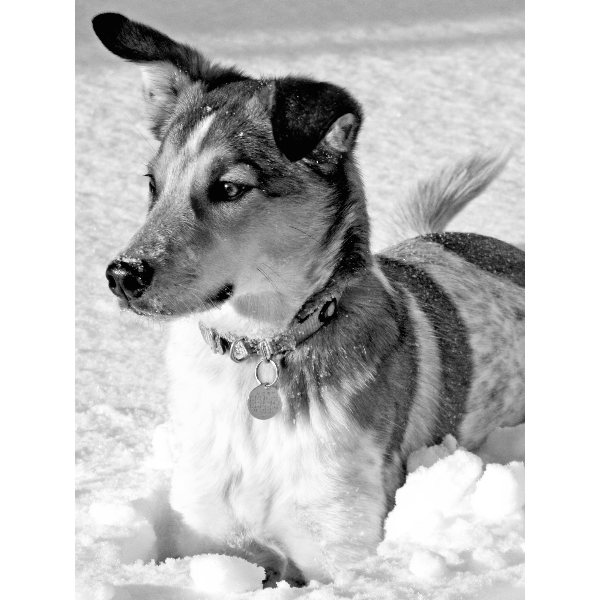

In [5]:
#Load Image
A = load.image("../DATA/dog.jpg")

#Convert to grayscale image
X = grayscale(A)

nx = width(X)
ny = height(X)

#Plot it
par(mfrow = c(1, 1), mar=c(0, 0, 0, 0))
plot(X, axes=FALSE)

In [7]:
#SVD decomposition
res <- svd(X)

S <- diag(res$d) #Diagonal matrix (Sigma)
U <- res$u
V <- res$v
sv <- res$d

# Here you can inspect this matrices
#dim(S)
#dim(U)
#dim(V)

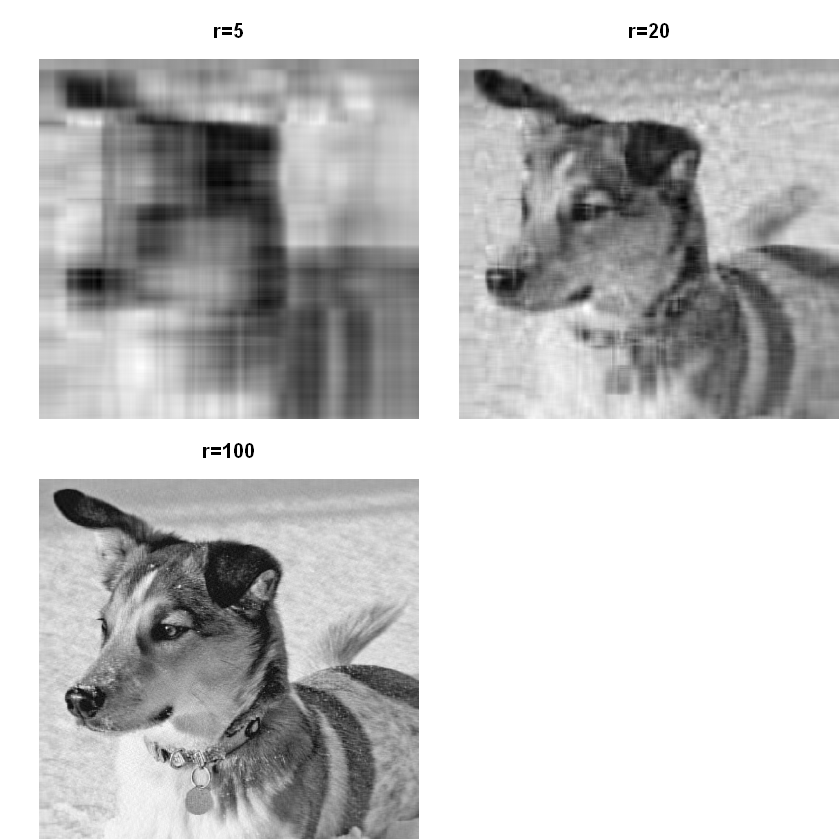

In [8]:
par(mfrow = c(2, 2), mar=c(0, 2, 3, 0))

rv <- c(5, 20, 100) # Truncation value
for (r in rv) {
    us <- as.matrix(U[, 1:r])
    vs <- as.matrix(V[, 1:r])
    ds <- as.matrix(S[1:r, 1:r])
    
    compressed_image <- (us %*% ds %*% t(vs))
    image(compressed_image[,nrow(compressed_image):1],col=grey(seq(0, 1, length = 256)), axes=FALSE)
    title(paste0('r=', r))
}

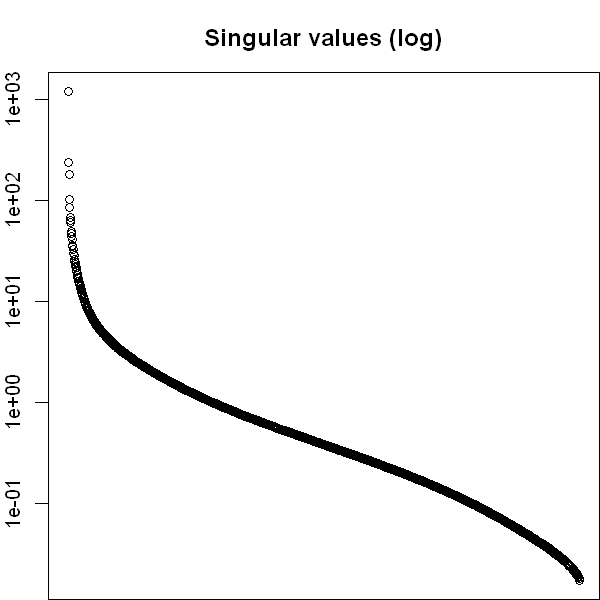

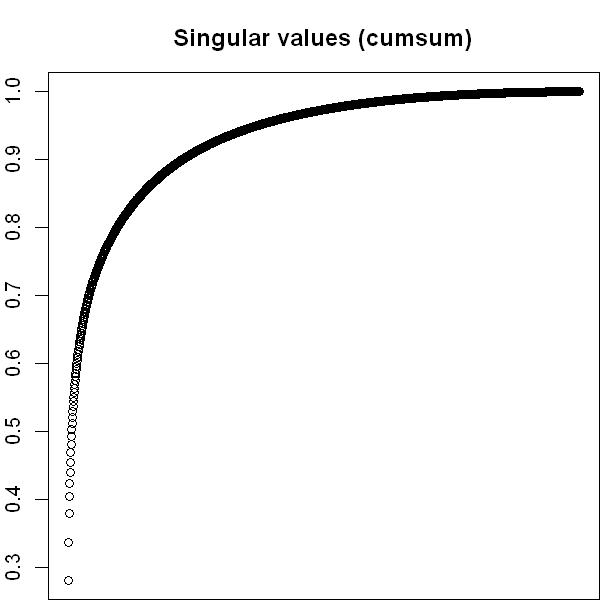

In [8]:
par(mfrow = c(1, 1), mar=c(0, 2, 3, 0))

plot(1:length(sv), sv, main="Singular values (log)", xlab="", ylab="Singular Value", log="y")
plot(1:length(sv), cumsum(sv)/sum(sv), main="Singular values (cumsum)", xlab="", ylab="Singular Value")

